In [1]:
# !pip install nilearn
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from nilearn import image, plotting, datasets

In [2]:
df1=pd.read_csv('STN_L_GE.csv', header=None)
df2=pd.read_csv('STN_R_GE.csv', header=None)
df3=pd.read_csv('PUT_L_GE.csv', header=None)
df4=pd.read_csv('PUT_R_GE.csv', header=None)
df5=pd.read_csv('Nigra_L_GE.csv', header=None)
df6=pd.read_csv('Nigra_R_GE.csv', header=None)

data_stnl=np.array(df1.T.values.tolist())
# print(len(data_stnl)) 125
data_stnr=np.array(df2.T.values.tolist())
# print(len(data_stnr)) 76
data_putl=np.array(df3.T.values.tolist())
# print(len(data_putl)) 1916
data_putr=np.array(df4.T.values.tolist())
# print(len(data_putr)) 2018
data_snl=np.array(df5.T.values.tolist())
# print(len(data_snl)) 95
data_snr=np.array(df6.T.values.tolist())
# print(len(data_snr)) 101
data_stn=np.concatenate((data_stnl, data_stnr), axis=0) #len(data_stn)=201
data_put=np.concatenate((data_putl, data_putr), axis=0) #len(data_put)=3934
data_sn=np.concatenate((data_snl, data_snr), axis=0) #len(data_sn)=196
data_combined=np.concatenate((data_stn, data_put, data_sn), axis=0) #len(data_combined)=4331
print(len(data_combined))

4331


In [3]:
num_gene=20267

In [4]:
# Read in MNI coordinates for STN
df_stnl_mni=pd.read_csv('STN_L_MNI.csv', header=None)
df_stnr_mni=pd.read_csv('STN_R_MNI.csv', header=None)
df_stn_mni=pd.concat([df_stnl_mni, df_stnr_mni])

stn_mni=df_stn_mni.T.values.tolist()
print(len(stn_mni[0]))

# Read in MNI coordinates for putamen
df_putl_mni=pd.read_csv('PUT_L_MNI.csv', header=None)
df_putr_mni=pd.read_csv('PUT_R_MNI.csv', header=None)
df_put_mni=pd.concat([df_putl_mni, df_putr_mni])

put_mni=df_put_mni.T.values.tolist()
print(len(put_mni[0]))

# Read in MNI coordinates substantia nigra
df_snl_mni=pd.read_csv('Nigra_L_MNI.csv', header=None)
df_snr_mni=pd.read_csv('Nigra_R_MNI.csv', header=None)
df_sn_mni=pd.concat([df_snl_mni, df_snr_mni])

sn_mni=df_sn_mni.T.values.tolist()
print(len(sn_mni[0]))

# Read voxel coordinates substantia nigra
df_snl_vxl=pd.read_csv('Nigra_L_VOXEL.csv', header=None)
df_snr_vxl=pd.read_csv('Nigra_R_VOXEL.csv', header=None)
df_sn_vxl=pd.concat([df_snl_vxl, df_snr_vxl])

sn_vxl=df_sn_vxl.T.values.tolist()
snl_vxl=df_snl_vxl.T.values.tolist()
snr_vxl=df_snr_vxl.T.values.tolist()

df_combined_mni=pd.concat([df_stn_mni, df_put_mni, df_sn_mni])
combined_mni=df_combined_mni.T.values.tolist()
print(len(combined_mni[0]))

201
3934
196
4331


In [5]:
df_stnl_vxl=pd.read_csv('STN_L_VOXEL.csv', header=None)
df_stnr_vxl=pd.read_csv('STN_R_VOXEL.csv', header=None)
df_stn_vxl=pd.concat([df_stnl_vxl, df_stnr_vxl])

stn_vxl=df_stn_vxl.T.values.tolist()

df_putl_vxl=pd.read_csv('PUT_L_VOXEL.csv', header=None)
df_putr_vxl=pd.read_csv('PUT_R_VOXEL.csv', header=None)
df_put_vxl=pd.concat([df_putl_vxl, df_putr_vxl])

put_vxl=df_put_vxl.T.values.tolist()

In [7]:
df_combined_vxl = pd.concat([df_stn_vxl, df_put_vxl, df_sn_vxl])
combined_vxl=df_combined_vxl.T.values.tolist()

In [5]:
# Interpolated percentage
percent=pd.read_csv('percentage.csv', header=None)
print(percent.iloc[:,333])
print(percent.iloc[:,345])
print(percent.iloc[:,346])

0    46.4
Name: 333, dtype: float64
0    47.368
Name: 345, dtype: float64
0    38.614
Name: 346, dtype: float64


In [31]:
# Read in thalamus gene expression data
df7=pd.read_csv('THAL_L_GE.csv', header=None)
df8=pd.read_csv('THAL_R_GE.csv', header=None)
data_thall=np.array(df7.T.values.tolist())
data_thalr=np.array(df8.T.values.tolist())
data_thal=np.concatenate((data_thall, data_thalr), axis=0)
print(len(data_thal))

4146


In [32]:
# Read in MNI coordinates in thalamus
df_thall_mni=pd.read_csv('THAL_L_MNI.csv', header=None)
df_thalr_mni=pd.read_csv('THAL_R_MNI.csv', header=None)
df_thal_mni=pd.concat([df_thall_mni, df_thalr_mni])

thal_mni=df_thal_mni.T.values.tolist()
print(len(thal_mni[0]))

# Read voxel coordinates in thalamus
df_thall_vxl=pd.read_csv('THAL_L_VOXEL.csv', header=None)
df_thalr_vxl=pd.read_csv('THAL_R_VOXEL.csv', header=None)
df_thal_vxl=pd.concat([df_thall_vxl, df_thalr_vxl])

thal_vxl=df_thal_vxl.T.values.tolist()

4146


In [33]:
thalr_vxl=df_thalr_vxl.T.values.tolist()
thall_vxl=df_thall_vxl.T.values.tolist()

In [37]:
thalr_mni=df_thalr_mni.T.values.tolist()
thall_mni=df_thall_mni.T.values.tolist()

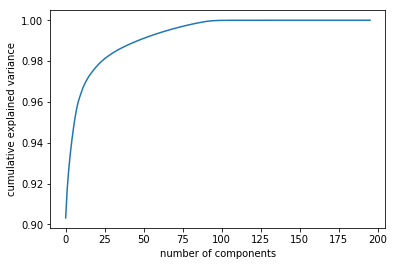

In [6]:
# Principal component analysis
# Choose the number of components (choose 75)
pca = PCA().fit(data_sn) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

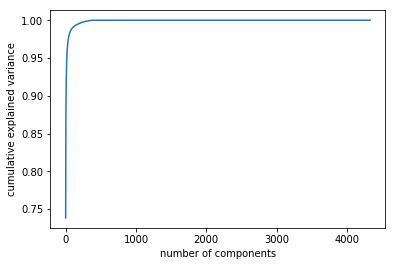

In [6]:
pca = PCA().fit(data_combined)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

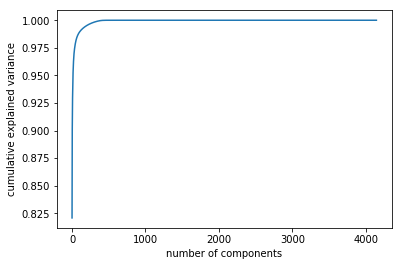

In [6]:
# PCA for thalamus data (choose 200)
pca = PCA().fit(data_thal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

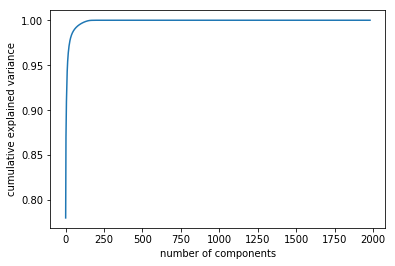

In [7]:
# PCA for thalamus data (choose 200)
pca = PCA().fit(data_thalr)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [12]:
#PCA projection
def principal_component_analysis(data, n_cp):
    pca = PCA(n_components=n_cp, random_state=42)
    x = pca.fit_transform(data)
    
    return x

In [14]:
# Use K-Means clustering on SN
X_sn=principal_component_analysis(data_sn, 75)
sum_of_squared_distances_sn=[]
# silhouette=[]
# c_h=[]
# d_b=[]

# k= 2 or 3
for k in range(1, 11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    km=kmeans.fit(X_sn)
    X_clustered=kmeans.fit_predict(X_sn)
    labels=kmeans.labels_
    sum_of_squared_distances_sn.append(km.inertia_)
print(sum_of_squared_distances_sn)

#     # Evaluate quality of clusters (chose these methods bc ground truth classes are unknown)
#     # Silhouette coefficient (higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping)
#     silhouette.append(metrics.silhouette_score(X_sn, labels, metric='euclidean'))

#     #     # Calinski Harabasz Index (higher->better defined clusters)
#     #     c_h.append(metrics.calinski_harabasz_score(X, labels))  # need to update sklearn or use conda

#     # Davies-Bouldin Index (lower->better separation)
#     d_b.append(metrics.davies_bouldin_score(X_sn, labels))

#     print('Silhouette coefficients: '+str(silhouette)) # higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping
#     # print('Calinski Harabasz Index: '+c_h)
#     print('Davies-Bouldin Index: '+str(d_b)) # lower->better separation
#     # cluster 0: 1 to 45 and 96 to 134, others: cluster 1

#     # Add clustering labels to data_sn
#     labels=np.array(labels)
#     data_sn=np.insert(data_sn, num_gene, values=labels, axis=1)

[13038817.74173791, 1244907.782388805, 1142713.9870908908, 1033653.030182841, 958633.8387901026, 902109.149148209, 854462.8077017902, 805697.402542682, 766231.5577833574, 722486.1117960335]


In [8]:
# Use K-Means clustering on STN
X_stn=principal_component_analysis(data_stn, 75)
sum_of_squared_distances_stn=[]
silhouette=[]
c_h=[]
d_b=[]

for k in range(1, 11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    km=kmeans.fit(X_stn)
    X_clustered=kmeans.fit_predict(X_stn)
    sum_of_squared_distances_stn.append(km.inertia_)
print(sum_of_squared_distances_stn)
#     # Evaluate quality of clusters (chose these methods bc ground truth classes are unknown)
#     # Silhouette coefficient (higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping)
#     labels_s=kmeans.labels_
#     silhouette.append(metrics.silhouette_score(X_stn, labels_s, metric='euclidean'))

#     #     # Calinski Harabasz Index (higher->better defined clusters)
#     #     c_h.append(metrics.calinski_harabasz_score(X, labels))  # need to update sklearn or use conda

#     # Davies-Bouldin Index (lower->better separation)
#     d_b.append(metrics.davies_bouldin_score(X_stn, labels_s))

#     print('Silhouette coefficients: '+str(silhouette)) # higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping
#     # print('Calinski Harabasz Index: '+c_h)
#     print('Davies-Bouldin Index: '+str(d_b)) # lower->better separation
#     # cluster 1: 1 to 58 and 126 to 133, others: cluster 0

#     # Add clustering labels to data_stn
#     labels_s=np.array(labels_s)
#     data_stn=np.insert(data_stn, num_gene, values=labels_s, axis=1)

[12392078.20181375, 1286901.228952053, 1090816.180798951, 961428.8176931886, 868028.9366554588, 820611.9299406146, 771583.5372629778, 729579.0329272348, 702488.8823163758, 666886.4640185939]


In [9]:
# Use K-Means clustering on Putamen
X_put=principal_component_analysis(data_put, 150)
sum_of_squared_distances_put=[]
# silhouette=[]
# c_h=[]
# d_b=[]

for k in range(1, 11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    km=kmeans.fit(X_put)
    X_clustered=kmeans.fit_predict(X_put)
    sum_of_squared_distances_put.append(km.inertia_)
print(sum_of_squared_distances_put)
#     # Evaluate quality of clusters (chose these methods bc ground truth classes are unknown)
#     # Silhouette coefficient (higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping)
#     labels_put=kmeans.labels_
#     silhouette.append(metrics.silhouette_score(X_put, labels_put, metric='euclidean'))

#     #     # Calinski Harabasz Index (higher->better defined clusters)
#     #     c_h.append(metrics.calinski_harabasz_score(X, labels))  # need to update sklearn or use conda

#     # Davies-Bouldin Index (lower->better separation)
#     d_b.append(metrics.davies_bouldin_score(X_put, labels_put))

#     print('Silhouette coefficients: '+str(silhouette)) # higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping
#     # print('Calinski Harabasz Index: '+c_h)
#     print('Davies-Bouldin Index: '+str(d_b)) # lower->better separation

#     # Adding clustering labels to data_put
#     labels_put=np.array(labels_put)
#     print(len(data_put[0]))
#     data_put=np.insert(data_put, num_gene, values=labels_put, axis=1)
#     print(len(data_put[0]))

[44224383.77593608, 17092575.05615365, 12235232.065492498, 11046960.050967926, 10119891.069726331, 9308316.377412355, 8775914.03159571, 8299828.210072018, 7822500.185319763, 7449990.472593089]


In [10]:
# Use K-Means clustering on combined data
X_comb=principal_component_analysis(data_combined, 200)
sum_of_squared_distances_cb=[]
# silhouette=[]
# c_h=[]
# d_b=[]
for k in range(1, 11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    km=kmeans.fit(X_comb)
    X_clustered=kmeans.fit_predict(X_comb)
    sum_of_squared_distances_cb.append(km.inertia_)
print(sum_of_squared_distances_cb)
# # Evaluate quality of clusters (chose these methods bc ground truth classes are unknown)
# # Silhouette coefficient (higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping)
# labels_c=kmeans.labels_
# silhouette.append(metrics.silhouette_score(X_comb, labels_c, metric='euclidean'))

# #     # Calinski Harabasz Index (higher->better defined clusters)
# #     c_h.append(metrics.calinski_harabasz_score(X, labels))  # need to update sklearn or use conda

# # Davies-Bouldin Index (lower->better separation)
# d_b.append(metrics.davies_bouldin_score(X_comb, labels_c))
    
# print('Silhouette coefficients: '+str(silhouette)) # higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping
# # print('Calinski Harabasz Index: '+c_h)
# print('Davies-Bouldin Index: '+str(d_b)) # lower->better separation

# # Add clustering labels to data_combined
# labels_c=np.array(labels_c)
# print(len(data_combined[0]))
# data_combined=np.insert(data_combined, num_gene, values=labels_c, axis=1)
# print(len(data_combined[0]))

[83443685.45055763, 21802093.388293784, 17044859.45259834, 14722398.312922318, 13767846.058770211, 12852144.617527187, 12137967.09179237, 11613648.738441473, 11093660.937110815, 10612322.416496255]


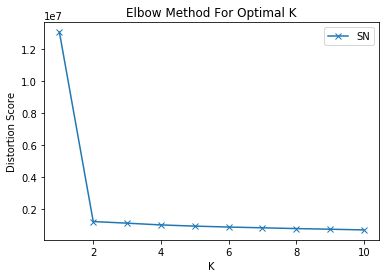

In [16]:
# Elbow plot
K = range(1, 11)
plt.plot(K, sum_of_squared_distances_sn, 'x-', label='SN')
# plt.plot(K, sum_of_squared_distances_stn, 'x-', label='STN')
# plt.plot(K, sum_of_squared_distances_put, 'x-', label='Putament')
# plt.plot(K, sum_of_squared_distances_cb, 'x-', label='Combined')
plt.legend(loc='upper right')
plt.xlabel('K')
plt.ylabel('Distortion Score')
plt.title('Elbow Method For Optimal K')
plt.show()

In [35]:
# Use K-Means clustering on thalamus
X_thal=principal_component_analysis(data_thalr, 200)
sum_of_squared_distances=[]
silhouette=[]
c_h=[]
d_b=[]

# for k in range(2,8):
k = 7
kmeans=KMeans(n_clusters=k, random_state=42)
km=kmeans.fit(X_thal)
X_clustered=kmeans.fit_predict(X_thal)
sum_of_squared_distances.append(km.inertia_)

# Evaluate quality of clusters (chose these methods bc ground truth classes are unknown)
# Silhouette coefficient (higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping)
labels=kmeans.labels_
silhouette.append(metrics.silhouette_score(X_thal, labels, metric='euclidean'))

#     # Calinski Harabasz Index (higher->better defined clusters)
#     c_h.append(metrics.calinski_harabasz_score(X, labels))  # need to update sklearn or use conda

# Davies-Bouldin Index (lower->better separation)
d_b.append(metrics.davies_bouldin_score(X_thal, labels))

print('Silhouette coefficients: '+str(silhouette)) # higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping
# print('Calinski Harabasz Index: '+c_h)
print('Davies-Bouldin Index: '+str(d_b)) # lower->better separation
# cluster 0: 1 to 45 and 96 to 134, others: cluster 1

# Add clustering labels to data_sn
labels=np.array(labels)
data_thalr=np.insert(data_thalr, num_gene, values=labels, axis=1)

# 2 clusters yield the best result

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Silhouette coefficients: [0.2121148292682687]
Davies-Bouldin Index: [1.8855656174568207]


In [41]:
# Use K-Means clustering on thalamus
X_thal=principal_component_analysis(data_thall, 200)
sum_of_squared_distances=[]
silhouette=[]
c_h=[]
d_b=[]

k=7
# for k in range(2, 8):
kmeans=KMeans(n_clusters=k, random_state=42)
km=kmeans.fit(X_thal)
X_clustered=kmeans.fit_predict(X_thal)
sum_of_squared_distances.append(km.inertia_)

# Evaluate quality of clusters (chose these methods bc ground truth classes are unknown)
# Silhouette coefficient (higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping)
labels=kmeans.labels_
silhouette.append(metrics.silhouette_score(X_thal, labels, metric='euclidean'))

#     # Calinski Harabasz Index (higher->better defined clusters)
#     c_h.append(metrics.calinski_harabasz_score(X, labels))  # need to update sklearn or use conda

# Davies-Bouldin Index (lower->better separation)
d_b.append(metrics.davies_bouldin_score(X_thal, labels))

print('Silhouette coefficients: '+str(silhouette)) # higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping
# print('Calinski Harabasz Index: '+c_h)
print('Davies-Bouldin Index: '+str(d_b)) # lower->better separation
# cluster 0: 1 to 45 and 96 to 134, others: cluster 1

# Add clustering labels to data_sn
labels=np.array(labels)
data_thall=np.insert(data_thall, num_gene, values=labels, axis=1)

# 2 clusters yield the best result

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Silhouette coefficients: [0.1857476547393275]
Davies-Bouldin Index: [1.9384005868164922]


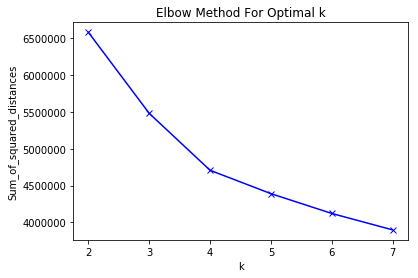

In [24]:
# Elbow plot
K = range(1, 11)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
print(labels)

[1 1 1 ... 2 2 2]


In [10]:
# write labels and voxel coordinates to a text file
file = open('voxel_snl_3.txt', 'w+')
for i in range(len(data_snl)):
    file.write(str(labels[i])+' '+str(snl_vxl[0][i])+' '+str(snl_vxl[1][i])+' '+str(snl_vxl[2][i])+'\n')
    
file.close()

In [12]:
# write labels and voxel coordinates to a text file
file = open('voxel_snr_3.txt', 'w+')
for i in range(len(data_snr)):
    file.write(str(labels[i])+' '+str(snr_vxl[0][i])+' '+str(snr_vxl[1][i])+' '+str(snr_vxl[2][i])+'\n')
    
file.close()

In [10]:
# write labels and voxel coordinates to a text file
file = open('nifti_combined.txt', 'w+')
for i in range(len(data_combined)):
    file.write(str(labels[i])+' '+str(combined_vxl[0][i])+' '+str(combined_vxl[1][i])+' '+str(combined_vxl[2][i])+'\n')
    
file.close()

In [39]:
# write labels and voxel coordinates to a text file
file = open('voxel_thalr_7.txt', 'w+')
for i in range(len(data_thalr)):
    file.write(str(labels[i]+8)+' '+str(thalr_vxl[0][i])+' '+str(thalr_vxl[1][i])+' '+str(thalr_vxl[2][i])+'\n')
    
file.close()

In [40]:
# write labels and mni coordinates to a text file
file = open('mni_thalr_7.txt', 'w+')
for i in range(len(data_thalr)):
    file.write(str(labels[i]+8)+' '+str(thalr_mni[0][i])+' '+str(thalr_mni[1][i])+' '+str(thalr_mni[2][i])+'\n')
    
file.close()

In [28]:
# write labels and voxel coordinates to a text file
file = open('voxel_thall_7.txt', 'w+')
for i in range(len(data_thall)):
    file.write(str(labels[i]+1)+' '+str(thall_vxl[0][i])+' '+str(thall_vxl[1][i])+' '+str(thall_vxl[2][i])+'\n')
    
file.close()

In [42]:
# write labels and mni coordinates to a text file
file = open('mni_thall_7.txt', 'w+')
for i in range(len(data_thall)):
    file.write(str(labels[i]+1)+' '+str(thall_mni[0][i])+' '+str(thall_mni[1][i])+' '+str(thall_mni[2][i])+'\n')
    
file.close()

In [8]:
# creating list of coordinates in each cluster
c=['r', 'b', 'g', 'r', 'm', 'pink']
x=[[] for _ in range(2)]
y=[[] for _ in range(2)]
z=[[] for _ in range(2)]

coord=[[] for _ in range(2)]

for i in range(len(data_sn)):
    for j in range(2):
        if data_sn[i][num_gene]==j:
            x[j].append(sn_mni[0][i])
            y[j].append(sn_mni[1][i])
            z[j].append(sn_mni[2][i])
            
            coord[j].append((sn_mni[0][i], sn_mni[1][i], sn_mni[2][i]))

In [124]:
print(len(coord[0]))
print(len(coord[1]))

84
112


In [17]:
# # load harvard-oxford subcortical dataset
# dataset = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr0-1mm')
# # load Pauli et al. (2017) atlas with in total 12 subcortical nodes
# dataset2 = datasets.fetch_atlas_pauli_2017()

In [ ]:
# load nifti image
img = nilearn.load_image('Gordon_and_subnucleus_Dartel_space.nii')

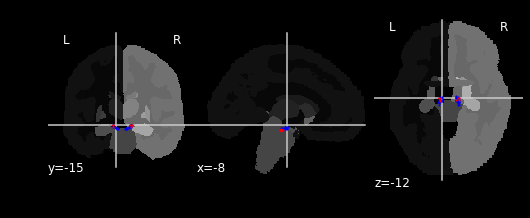

In [40]:
# plot clusters onto image
mean_img = image.mean_img(dataset.maps)
# coordinates: vSN: [±9, -13, -12], medial SNc: [±8, -16, -12], lateral SNc: [±12, -17, -9] (from SN connectivity paper)
display = plotting.plot_anat(mean_img, cut_coords=[-8, -15, -12])

for i in range(1, -1, -1):
    display.add_markers(coord[i], marker_color=c[i], marker_size=1)
    
display.savefig('SN_2clusters.png')    
plotting.show()
# Look at coronal plane (left), red cluster roughly corresponds to SNc and blue cluster roughly corresponds to SNr

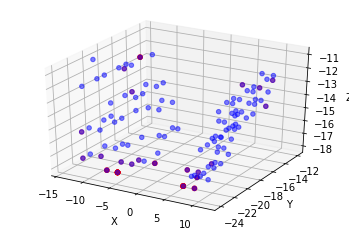

In [10]:
# scatter plots with matplotlib
fig=plt.figure()

ax = fig.add_subplot(111, projection='3d')
for i in range(1, -1, -1):
    ax.scatter(x[i], y[i], z[i], c=c[i], marker='o', alpha=0.5)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
    
plt.show()

In [23]:
print(str(max(x[0]))+' '+str(min(x[0])))
print(str(max(y[0]))+' '+str(min(y[0])))
print(str(max(z[0]))+' '+str(min(z[0])))

print(str(max(x[1]))+' '+str(min(x[1])))
print(str(max(y[1]))+' '+str(min(y[1])))
print(str(max(z[1]))+' '+str(min(z[1])))

12 -12
-15 -24
-12 -18
12 -14
-12 -24
-11 -18


[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 1]
  [0 0 0

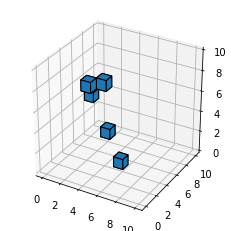

In [38]:
ma = np.random.choice([0,1], size=(10,10,10), p=[0.99, 0.01])
print(ma)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')

ax.voxels(ma, edgecolor="k")

plt.show()

In [ ]:
# make a list of voxels for each cluster
c=['r', 'b', 'y', 'g', 'm', 'pink']
x=[[] for _ in range(6)]
y=[[] for _ in range(6)]
z=[[] for _ in range(6)]

coord=[[] for _ in range(6)]

for i in range(len(data_stn)):
    for j in range(6):
        if data_stn[i][num_gene]==j:
            x[j].append(stn_mni[0][i])
            y[j].append(stn_mni[1][i])
            z[j].append(stn_mni[2][i])
            
            coord[j].append((stn_mni[0][i], stn_mni[1][i], stn_mni[2][i]))

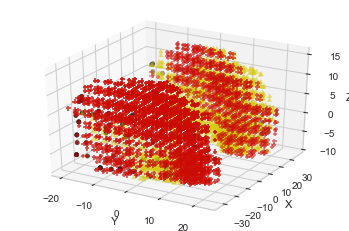

In [116]:
# def make_scatter_plot(stn_mni):
fig=plt.figure()

x=[[] for _ in range(3)]
y=[[] for _ in range(3)]
z=[[] for _ in range(3)]

for i in range(len(data_put)):
    for j in range(3):
        if data_put[i][num_gene]==j:
            x[j].append(put_mni[0][i])
            y[j].append(put_mni[1][i])
            z[j].append(put_mni[2][i])
            
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y[0], x[0], z[0], c='y', marker='^', alpha=0.5)
ax.scatter(y[1], x[1], z[1], c='k', marker='o')
ax.scatter(y[2], x[2], z[2], c='r', marker='+')
    
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
    
plt.show()

In [28]:
# def make_scatter_plot(stn_mni):

x=[[] for _ in range(2)]
y=[[] for _ in range(2)]
z=[[] for _ in range(2)]
coord=[[] for _ in range(2)]
c=['r', 'b', 'g', 'y', 'm']

for i in range(len(data_combined)):
    for j in range(2):
        if data_combined[i][num_gene]==j:
            x[j].append(combined_mni[0][i])
            y[j].append(combined_mni[1][i])
            z[j].append(combined_mni[2][i])              
            coord[j].append((combined_mni[0][i], combined_mni[1][i], combined_mni[2][i]))

In [57]:
# plot clusters onto image
mean_img = image.mean_img(dataset.maps)
display = plotting.plot_anat(mean_img, cut_coords=[-15, -2, 0])

for i in range(2):
    display.add_markers(coord[i], marker_color=c[i], marker_size=1)
    
display.savefig('cb_plot_display.png')    
display.close()
plotting.show()

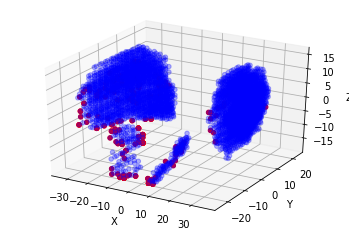

In [32]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for i in range(1, -1, -1):
ax.scatter(x[0], y[0], z[0], c=c[1], marker='o', alpha=0.3)
ax.scatter(x[1], y[1], z[1], c=c[0], marker='o', alpha=1)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
    
plt.show()

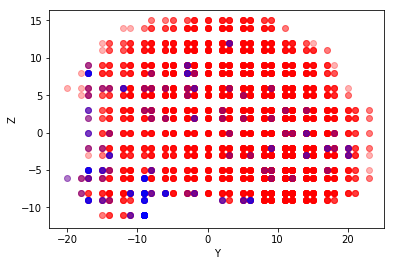

In [34]:
# Projecting 3d plot on to Y-Z plane
fig2=plt.figure()

for i in range(2):
    plt.scatter(y[i], z[i], c=c[i], alpha=0.3)

plt.xlabel('Y')
plt.ylabel('Z')

plt.show()

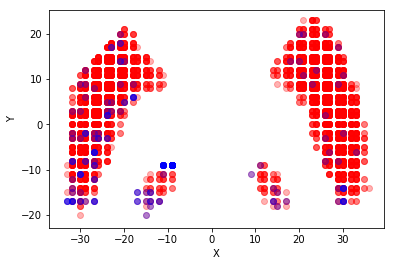

In [36]:
# Projecting 3d plot on to Y-Z plane
fig2=plt.figure()

for i in range(2):
    plt.scatter(x[i], y[i], c=c[i], alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

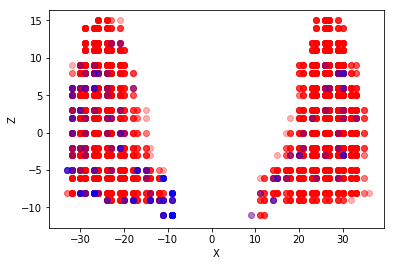

In [37]:
# Projecting 3d plot on to Y-Z plane
fig2=plt.figure()

for i in range(2):
    plt.scatter(x[i], z[i], c=c[i], alpha=0.3)

plt.xlabel('X')
plt.ylabel('Z')

plt.show()

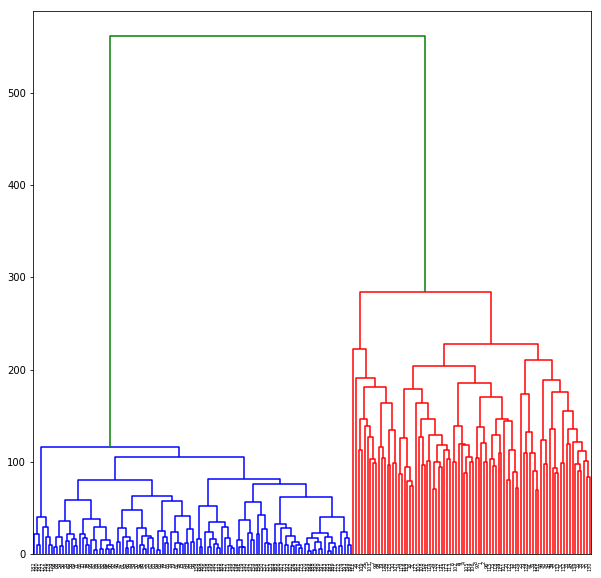

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
import numpy as np
hierarchy.set_link_color_palette(['b', 'r'])
X=data_sn
# clustering = AgglomerativeClustering().fit(X)
# AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
#                         connectivity=None, linkage='average', memory=None, n_clusters=2,
#                         pooling_func='deprecated')
# print(clustering.labels_)
# Got the same result as K-means

# plot dendrogram
linked = linkage(X, 'complete')

label_list = range(1, 197)

plt.figure(figsize=(10, 10))
dendrogram(linked,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            above_threshold_color='g',
            show_leaf_counts=True)
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


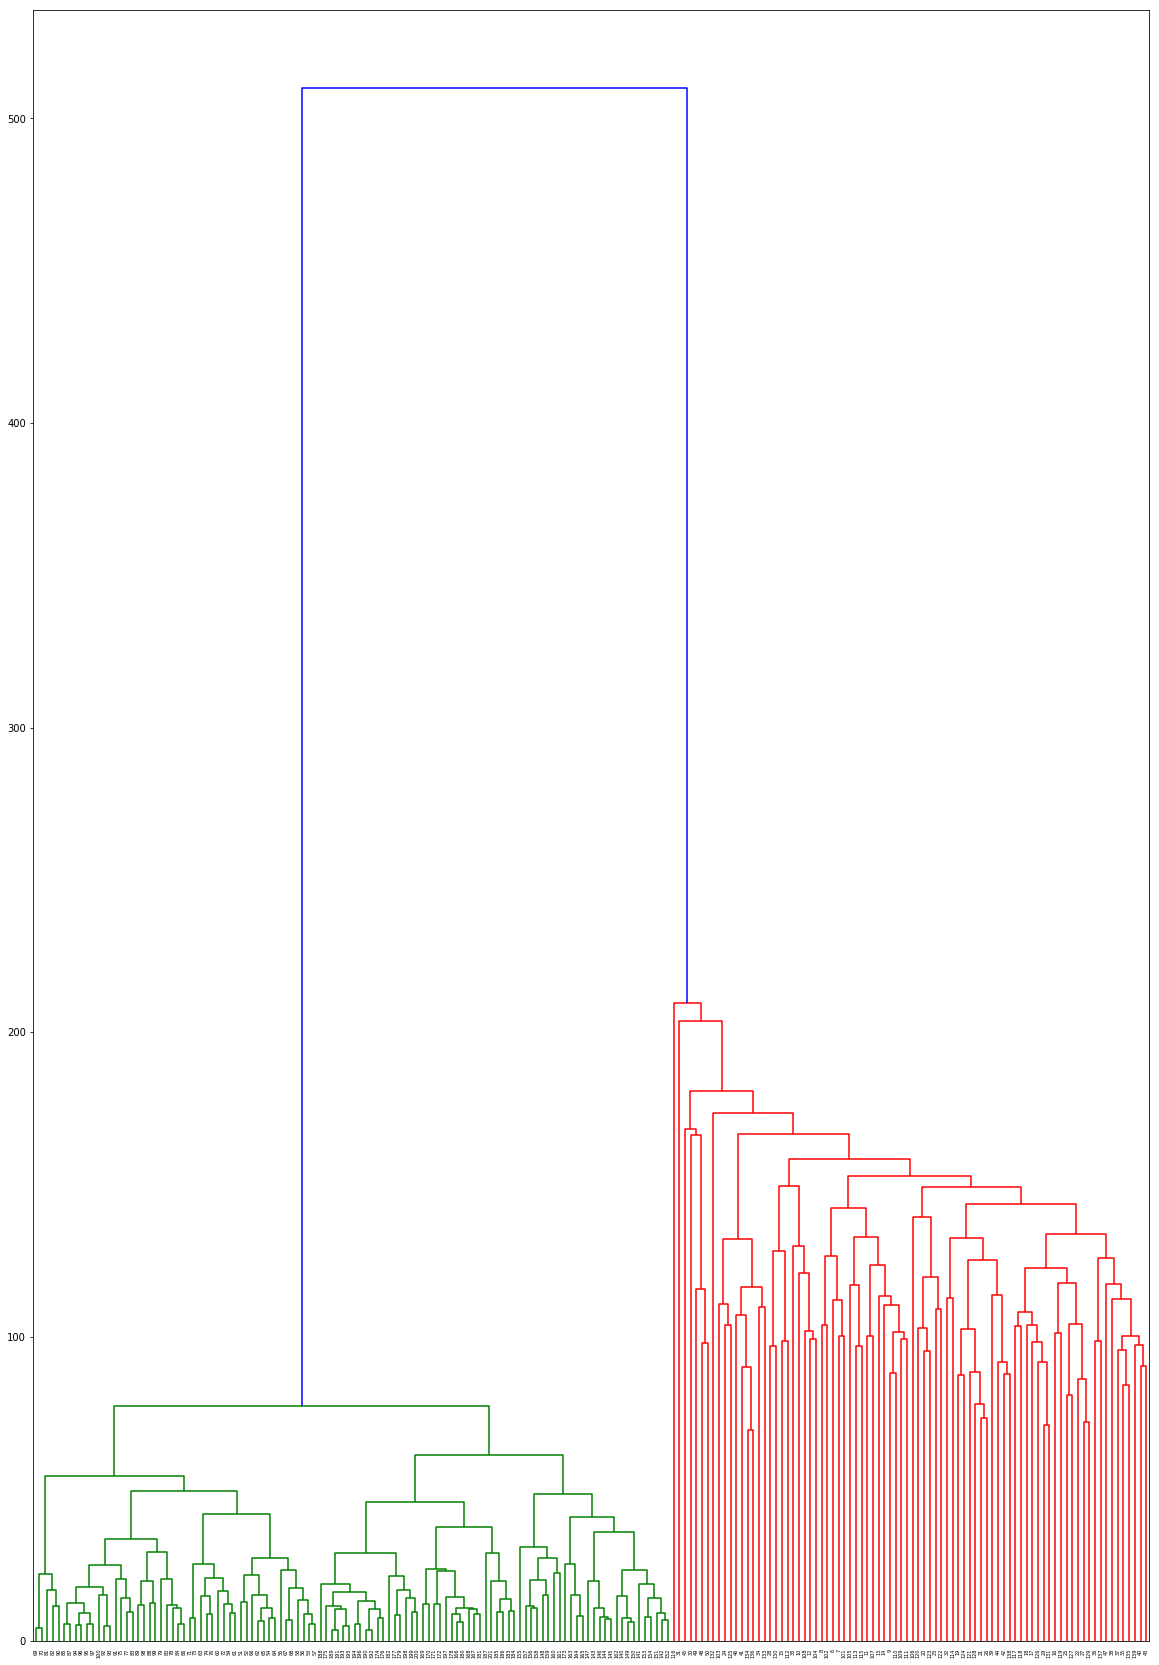

In [94]:
clustering = AgglomerativeClustering().fit(X)
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')
print(clustering.labels_)
# Got the same result as K-means

# plot dendrogram
linked = linkage(X, 'average')

label_list = range(1, 202)

plt.figure(figsize=(20, 30))
dendrogram(linked,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


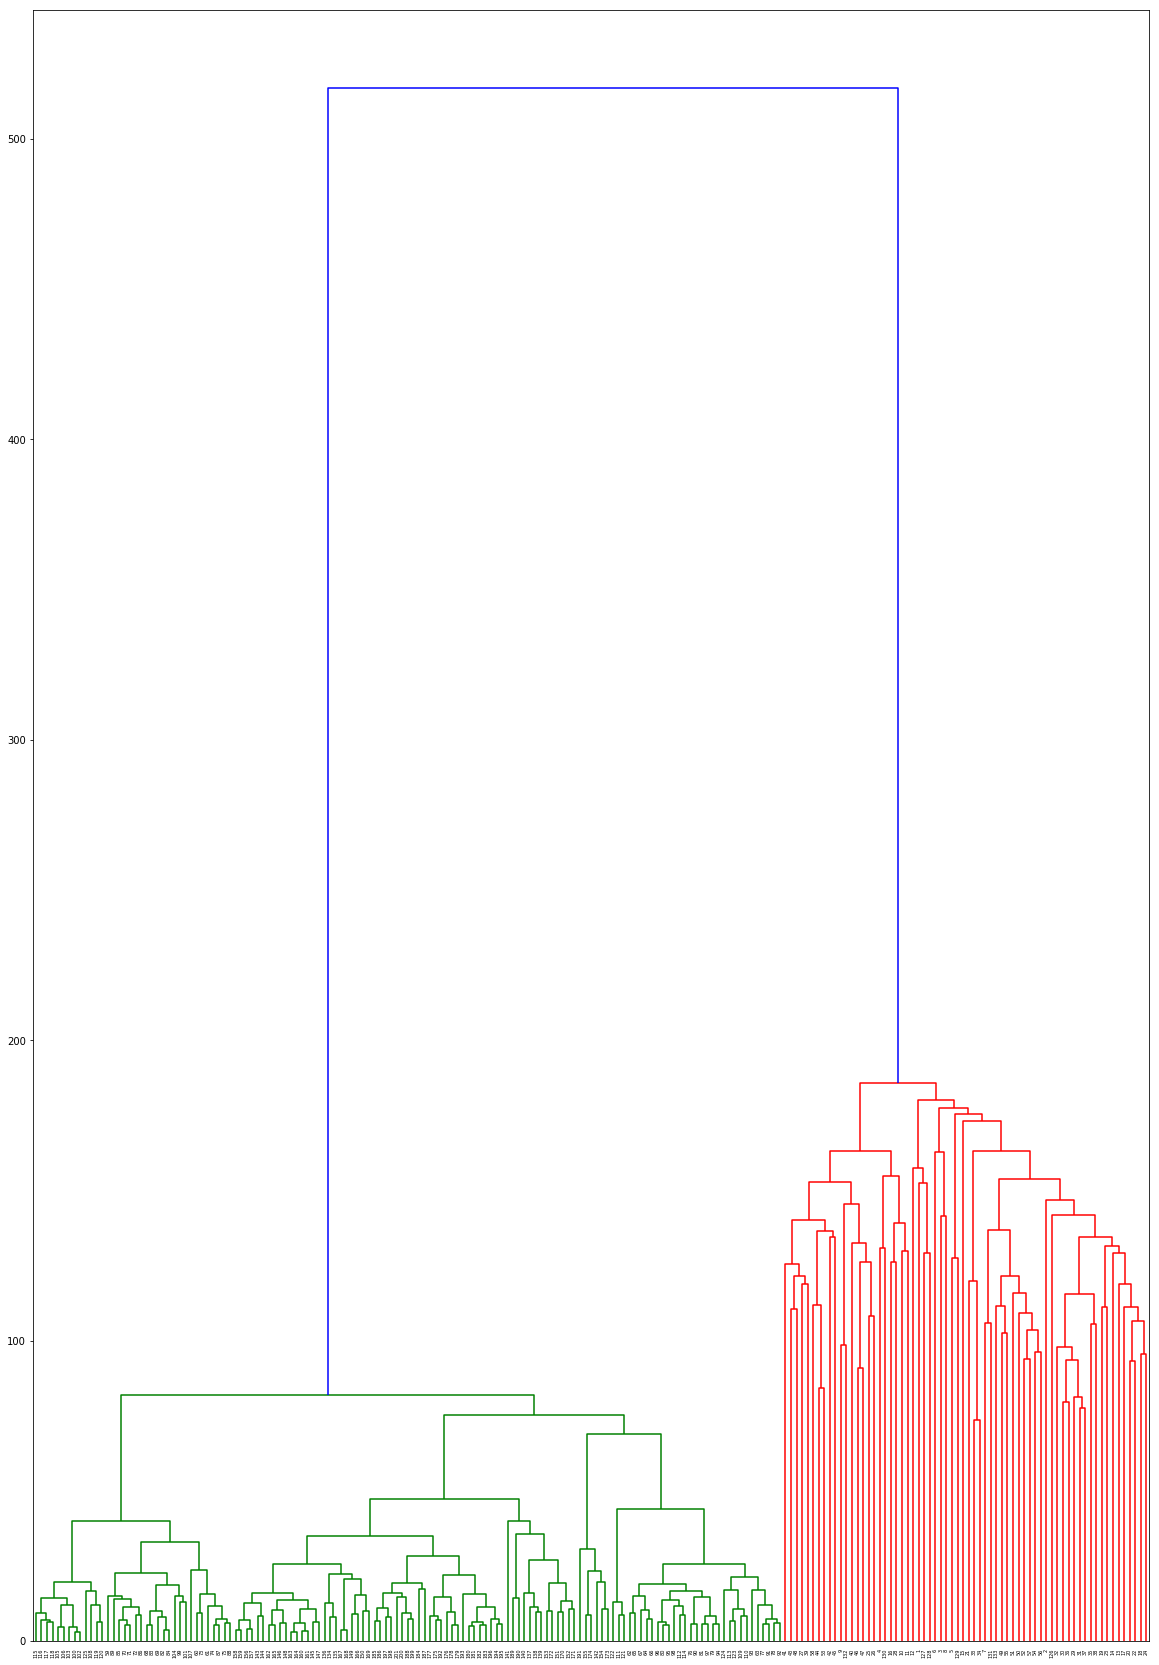

In [9]:
clustering = AgglomerativeClustering().fit(X)
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')
print(clustering.labels_)
# Got the same result as K-means

# plot dendrogram
linked = linkage(X, 'average')

label_list = range(1, 202)

plt.figure(figsize=(20, 30))
dendrogram(linked,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


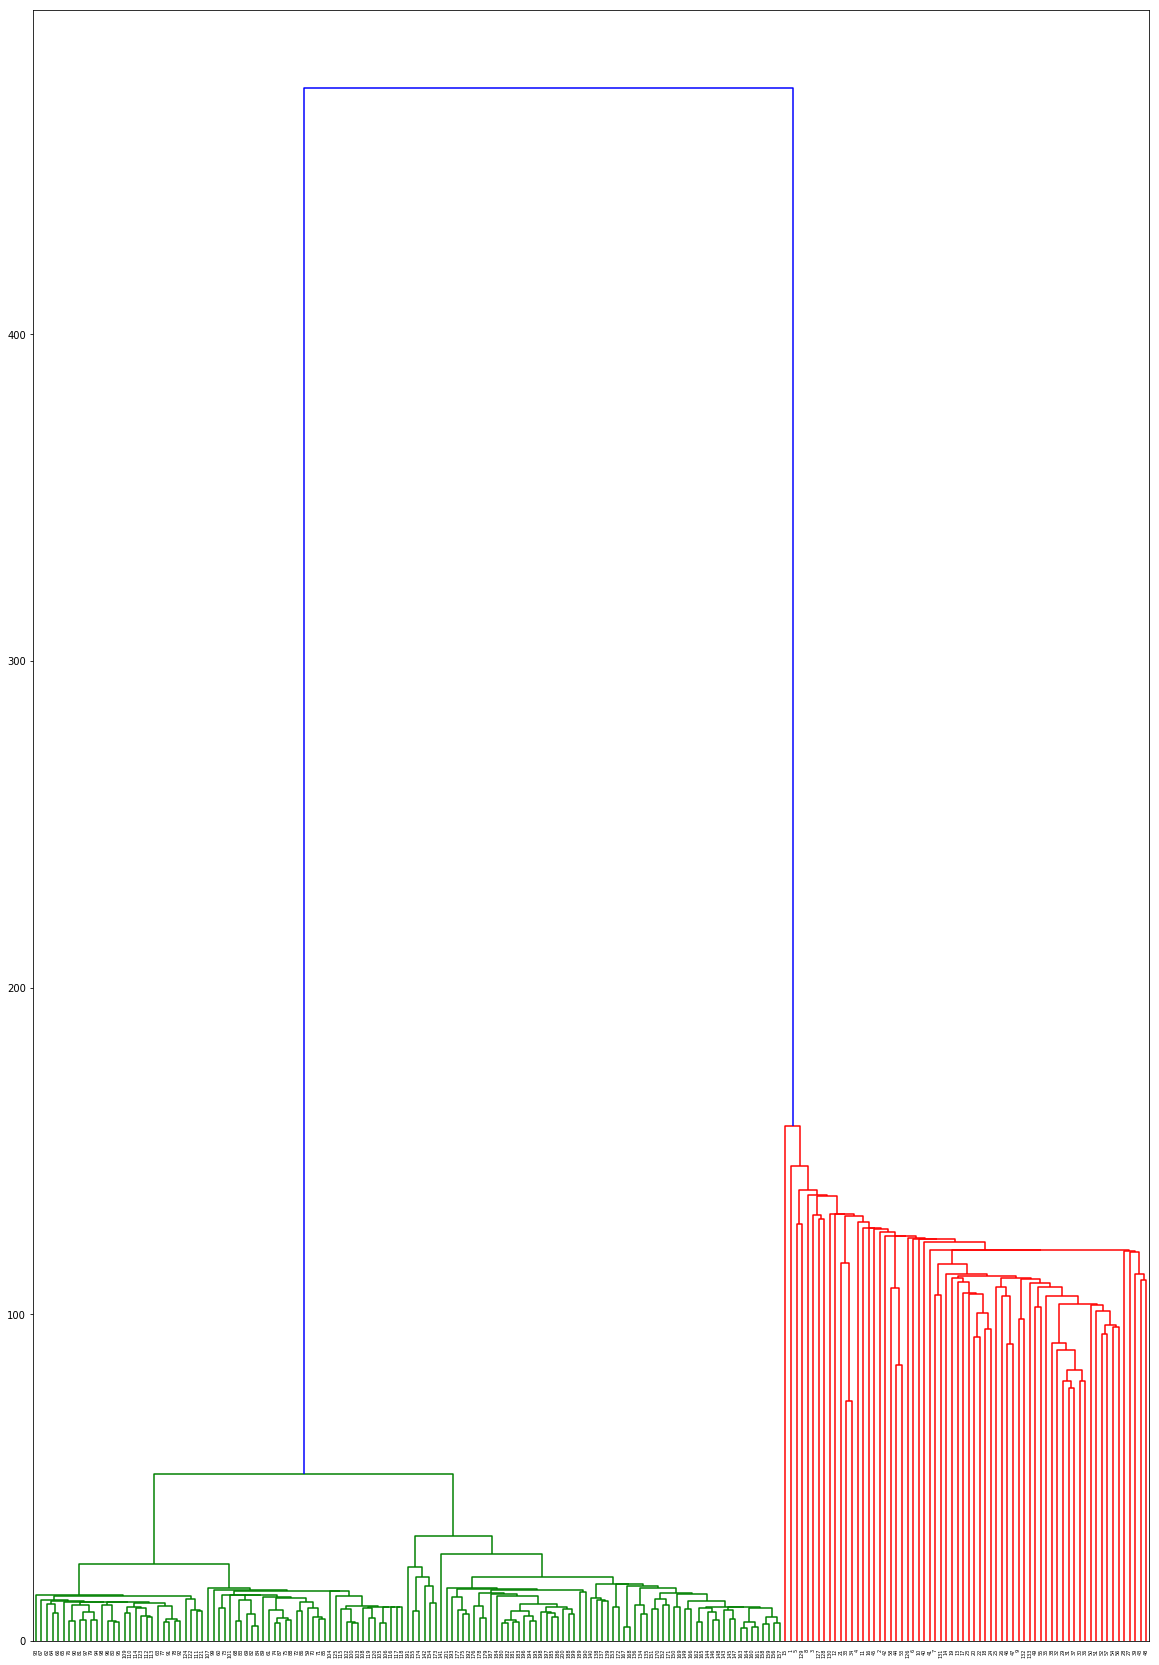

In [13]:
clustering = AgglomerativeClustering().fit(X)
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')
print(clustering.labels_)
# Got the same result as K-means

# plot dendrogram
linked = linkage(X, 'single')

label_list = range(1, 202)

plt.figure(figsize=(20, 30))
dendrogram(linked,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [113]:
# Predict the position of each sample along y-axis
X_train, X_test, y_train, y_test = train_test_split(X_sn, sn_mni[2], test_size=0.20, random_state=42)    

# Lasso
# def lasso(X_train, X_test, y_train, y_test):
ls=Lasso(alpha=0.1)
model=ls.fit(X_train, y_train)
    
y_pred = ls.predict(X_test)
accuracy = ls.score(X_test, y_test)
print("lasso: "+str(accuracy))

lasso: 0.5066999977832716


Text(0, 0.5, 'Predictions')

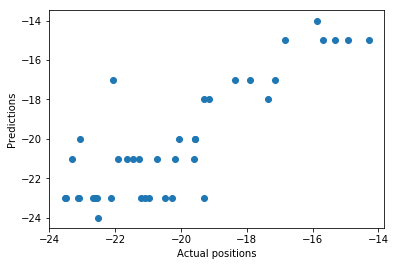

In [63]:
# Plot
plt.scatter(y_pred, y_test)
plt.xlabel('Actual positions')
plt.ylabel('Predictions')

[-2.01206818 -0.71156423 -0.51297868  0.85344441  0.65502617 -0.5447759
 -0.73587856  0.59964868  0.77254877  0.66789132]
0.40077891972670887


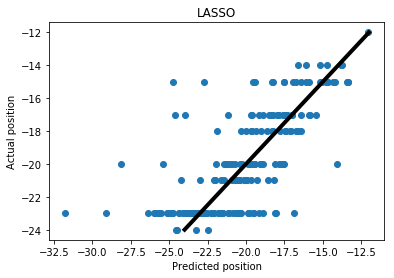

In [123]:
# 10-fold cross-validation on coronal plane
y=sn_mni[1]
scores=cross_val_score(model, X_sn, y, cv=10)
print(scores)
predictions=cross_val_predict(model, X_sn, y, cv=10)
accuracy=metrics.r2_score(y, predictions)
print(accuracy)

fig, ax = plt.subplots()
ax.scatter(predictions, y)
ax.plot([min(y), max(y)], [min(y), max(y)], 'k-', lw=4)
ax.set_title('LASSO')
ax.set_xlabel('Predicted position')
ax.set_ylabel('Actual position')
plt.show()

In [119]:
# Logistic regression
# def logistic_regression(X_train, X_test, y_train, y_test):
lg_c = LogisticRegression(random_state=42, solver='saga', multi_class='multinomial', penalty='l1')
model2=lg_c.fit(X_train, y_train)
   
# y_pred1 = lg_c.predict(X_test)
# accuracy1 = accuracy_score(y_test, y_pred1)
# print("logistic regression: "+str(accuracy1))
# cm1 = confusion_matrix(y_test, y_pred1)
y=sn_mni[1]
scores=cross_val_score(model2, X_sn, y, cv=10)
print(scores)
predictions=cross_val_predict(model2, X_sn, y, cv=10)
accuracy=metrics.r2_score(y, predictions)
print(accuracy)

# cm4 = confusion_matrix(y_test, y_pred4)
    
#     return accuracy, cm  

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_i

[0.29166667 0.69565217 0.5        0.38095238 0.10526316 0.47368421
 0.66666667 0.38888889 0.375      0.25      ]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

0.34964856475547745


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [120]:
# Dummy regressor
d_c = DummyRegressor(strategy='median')
model3=d_c.fit(X_train, y_train)
y=sn_mni[1]
scores=cross_val_score(model3, X_sn, y, cv=10)
print(scores)
predictions=cross_val_predict(model3, X_sn, y, cv=10)
accuracy=metrics.r2_score(y, predictions)
print(accuracy)
# y_pred5 = d_c.predict(X_test)
# accuracy5 = d_c.score(X_test, y_test)
# print("dummy: "+str(accuracy5))
    
#     return accuracy, cm

[-1.22222222 -0.59340659 -0.1038961  -0.77419355 -0.60341794 -0.31274131
 -1.48157051 -0.48948375 -1.98984772 -1.99648113]
-0.23184845881716853


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a so

Best parameter (CV score=0.408):
{'logistic__C': 10000.0, 'pca__n_components': 15}


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

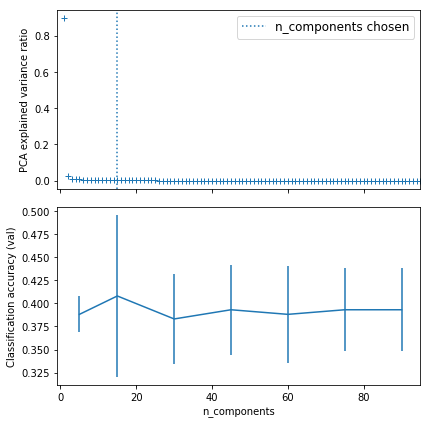

In [83]:
# Pipelining: chaining a PCA and a logistic regression
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# y-coordinates of voxels
X=data_stn
y=stn_mni[1]
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 60, 75, 90],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 95)

plt.tight_layout()
plt.show()

In [ ]:
# Modularity (Q) analysis requires a matrix of edges between nodes. It works with Louvain clustering.
# bctpy modularity

In [13]:
# Evaluate quality of clusters (chose these methods bc ground truth classes are unknown)
# Silhouette coefficient (higher->better defined clusters; -1 for incorrect clustering, +1 for dense, 0 for overlapping)
labels=kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

# Calinski Harabasz Index (higher->better defined clusters)
metrics.calinski_harabasz_score(X, labels) 

# Davies-Bouldin Index (lower->better separation)
metrics.davies_bouldin_score(X, labels)

In [ ]:
#Define colors of the clusters
LABEL_COLOR_MAP = {0:'Blue', 1: 'Crimson', 2: 'DarkGreen', 3: 'DarkMagenta', 4: 'DarkOrange'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
# Plot the scatter diagram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c=label_color, alpha=0.5)
plt.show()

In [ ]:
# Elbow plot
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()